# 🧠 Support Vector Classifier (SVC) — scikit-learn

`SVC` is a supervised learning model in the **Support Vector Machine (SVM)** family used for classification tasks. It works by finding the optimal **hyperplane** that best separates data points of different classes in a high-dimensional space.

---

## ⚙️ How It Works

1. Maps input features into higher dimensions using a **kernel function**.
2. Finds the optimal hyperplane that maximizes the **margin** between different classes.
3. Only the **support vectors** (critical data points) influence the model.

---

## 🔑 Key Parameters

```python
SVC(
    kernel='rbf',     # 'linear', 'poly', 'rbf', 'sigmoid'
    C=1.0,            # Regularization parameter
    gamma='scale'     # Kernel coefficient
)
```

- **kernel**: Defines the transformation strategy of input data.
- **C**: Controls the trade-off between maximizing the margin and minimizing misclassification.
- **gamma**: Controls the curvature of the decision boundary.

---

## 📊 Example: Waste Management Dataset

```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
data = pd.read_csv('waste management.csv')

# Features and Target
X = data[['waste_type', 'material_composition', 'recycling_potential', 'toxicity_level']]
y = data['management_strategy']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVC model
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
```

---

## ✅ Pros

- Works well for non-linear classification.
- Effective in high-dimensional spaces.
- Robust to overfitting (if tuned properly).

## ⚠️ Cons

- Slower for large datasets.
- Sensitive to feature scaling.
- Needs hyperparameter tuning for optimal results.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('dataset/waste management.csv')
data.head()

,waste_type,material_composition,recycling_potential,toxicity_level,management_strategy
0,3,0.198716,0.016588,81.011339,0
1,1,0.005522,0.512093,86.707232,0
2,3,0.815461,0.226496,91.324055,0
3,3,0.706857,0.645173,51.134240,0
4,1,0.729007,0.174366,50.151629,0


In [3]:
# Features (X) and target (y)
X = data[['waste_type', 'material_composition', 'recycling_potential', 'toxicity_level']]
y = data['management_strategy']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

SVC()

In [6]:
y_pred = model.predict(X_test)

In [7]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


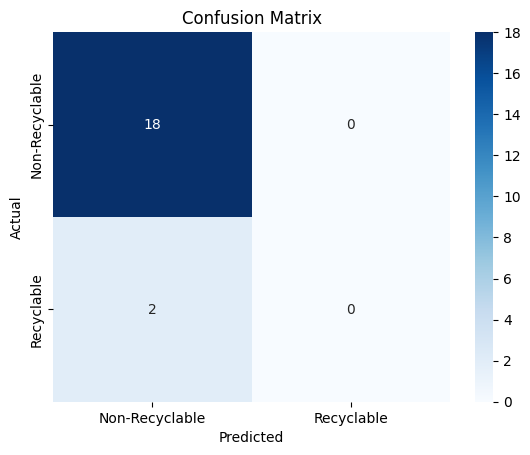

In [8]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Recyclable', 'Recyclable'], 
            yticklabels=['Non-Recyclable', 'Recyclable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=['Non-Recyclable', 'Recyclable']))

                precision    recall  f1-score   support

Non-Recyclable       0.90      1.00      0.95        18
    Recyclable       0.00      0.00      0.00         2

      accuracy                           0.90        20
     macro avg       0.45      0.50      0.47        20
  weighted avg       0.81      0.90      0.85        20



C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

In [10]:
# Imbalance dataset handling for better accuracy

data['management_strategy'].value_counts()

management_strategy
0    87
1    13
Name: count, dtype: int64

In [11]:
from imblearn.over_sampling import SMOTE
# Synthetic Minority Oversampling Technique
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

In [12]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [13]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [14]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=['Non-Recyclable', 'Recyclable']))

                precision    recall  f1-score   support

Non-Recyclable       0.90      1.00      0.95        18
    Recyclable       0.00      0.00      0.00         2

      accuracy                           0.90        20
     macro avg       0.45      0.50      0.47        20
  weighted avg       0.81      0.90      0.85        20



C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

In [15]:
import joblib
# Save the model to a file
joblib.dump(model, 'models/waste management_model.pkl')

['models/waste management_model.pkl']